## Observations and Insights 

In [5]:
#1. The plot of mouse s185 shows that the Capomulin drug treatment significantly reduces tumor size over the time frame of the study.  This mouse had its tumor reduced from 45 to 23 mm3.  This drug appears to be effective at treating the cancer in this mouse model study.

#2. Capomulin and Ramicane appear to be better drug treatments than Infubinol and Ceftamin because the former have lower final tumor volumes as seen in the boxplot.

#3. For mice treated with Capomulin, there is a significant correlation (0.71) between the weight of the mouse and the average tumor volume. In other words, the heaver the mouse, the larger the average tumor size.


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
compined_mouse_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",suffixes=('_x','_y'))

# Display the data table for preview
compined_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
len(compined_mouse_data["Mouse ID"].value_counts())

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = compined_mouse_data.loc[compined_mouse_data.duplicated(
    subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_data= compined_mouse_data.loc[compined_mouse_data['Mouse ID']== 'g989']
duplicate_mouse_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= compined_mouse_data[compined_mouse_data['Mouse ID'].isin(duplicate_mouse_ID)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [13]:
mean_by_drug_regimen = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_by_drug_regimen = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median() 
var_by_drug_regimen = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var() 
std_by_drug_regimen = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_by_drug_regimen = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem() 

summary = pd.concat([mean_by_drug_regimen, median_by_drug_regimen, var_by_drug_regimen, 
           std_by_drug_regimen, sem_by_drug_regimen], axis=1)
summary.columns = ['mean', 'median', 'var', 'std', 'sem']
# Display float values in dataframe with 2 decimal places and comma separator for thousands
pd.options.display.float_format = "{:,.2f}".format
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
summary = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

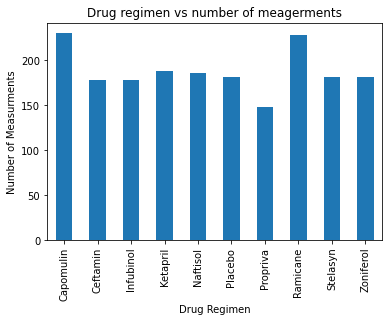

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_number_of_measurements= clean_df.groupby(['Drug Regimen']).size()

ax=total_number_of_measurements.plot(kind='bar')
plt.title('Drug regimen vs number of meagerments')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Measurments');
plt.show()

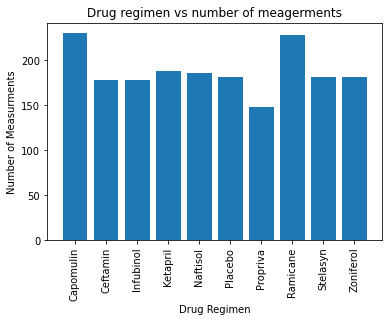

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
ax = plt.bar(total_number_of_measurements.index, total_number_of_measurements)
plt.title('Drug regimen vs number of meagerments')
plt.xlabel('Drug Regimen')
plt.ylabel ('Number of Measurments')
plt.xticks(rotation='vertical');

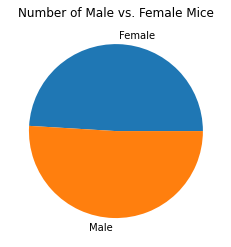

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = clean_df.groupby('Sex').size().plot.pie()
ax.set_ylabel('')
plt.title('Number of Male vs. Female Mice');

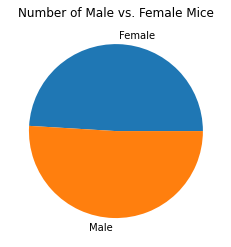

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_vs_f = clean_df.groupby('Sex').size()
plt.pie(m_vs_f, labels = m_vs_f.index);
plt.title('Number of Male vs. Female Mice');

## Quartiles, Outliers and Boxplots

In [19]:
# only keep data points for mice that were treated with the four drugs 
four_df = clean_df[ clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) ]
# Start by getting the index for the row with the last (greatest) timepoint for each mouse
idx_max_times = four_df.groupby (['Mouse ID'])['Timepoint'].idxmax()
# Filter out all rows in data frame EXCEPT the ones that have the index label idx_max_times
max_times_df = four_df.loc[idx_max_times, :]
max_times_df.set_index('Mouse ID', inplace=True)
max_tumor = max_times_df['Tumor Volume (mm3)']
max_tumor.rename('Last Tumor Volume (mm3)', inplace=True)

# add final tumor volume to each row of main dataframe for each mouse
# treated with the four drugs of interest
#clean_df = clean_df.join(max_tumor, on='Mouse ID', how='inner' )

print('''\
Final Tumor Volume (mm3) of each mouse accross four of the most promising  
treament regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.''')
print(max_tumor.round(2))

Final Tumor Volume (mm3) of each mouse accross four of the most promising  
treament regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
Mouse ID
a203   67.97
a251   65.53
a275   63.00
a411   38.41
a444   43.05
        ... 
y769   68.59
y793   31.90
y865   64.73
z578   30.64
z581   62.75
Name: Last Tumor Volume (mm3), Length: 100, dtype: float64


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1, Q2, Q3 = max_tumor.quantile([0.25,0.5,0.75]) 
iqr = Q3 - Q1
print('''For all mice treated by the promising four drugs; 
excludes other mice treated by other drugs. This is across all
four treatments, as per instructions.  It does not find IQR, 
percentiles or outliers within each treatment separately. For 
separate treatment for each drug, see the box plot in the next 
code block.''')
print(f'\nIQR: {iqr:.2f}')
print(f'\nQ1 25th percentile:  {Q1:.2f}')
print(f'Q2 50th percentile:  {Q2:.2f}')
print(f'Q3 75th percentile:  {Q3:.2f}')

# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 
    
    
# Determine outliers using upper and lower bounds
low_lim = Q1 - 1.5 * iqr
up_lim  = Q3 + 1.5 * iqr
print(f'\nOutliers:\n    Lower Bound: {low_lim:.2f}\n    Upper Bound: {up_lim:.2f}')
print('\nNumber of outliers as determined by being outside 1.5*IRQ from Q1 and Q3:')
outliers = max_tumor[ (max_tumor > up_lim) | (max_tumor <  low_lim) ]
print(f'   {len(outliers)}')
print('''\nIf each drug regmiment is done separately to calculate outliers, 
there is an outliers found.  See the below boxplot.''')

For all mice treated by the promising four drugs; 
excludes other mice treated by other drugs. This is across all
four treatments, as per instructions.  It does not find IQR, 
percentiles or outliers within each treatment separately. For 
separate treatment for each drug, see the box plot in the next 
code block.

IQR: 22.74

Q1 25th percentile:  37.19
Q2 50th percentile:  45.00
Q3 75th percentile:  59.93

Outliers:
    Lower Bound: 3.07
    Upper Bound: 94.04

Number of outliers as determined by being outside 1.5*IRQ from Q1 and Q3:
   0

If each drug regmiment is done separately to calculate outliers, 
there is an outliers found.  See the below boxplot.


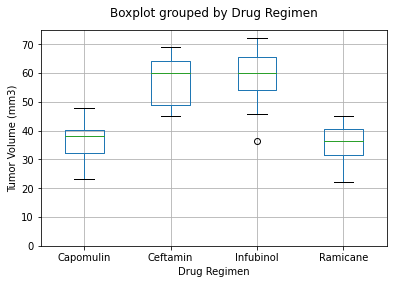

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax = max_times_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
#### TODO:  highlight any potential outliers in the plot by changing their color and style. #######
plt.title('')
ax.set_ylabel('Tumor Volume (mm3)');
ax.set_ylim([0,75]);

## Line and Scatter Plots

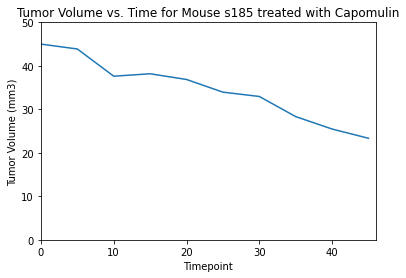

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# find all rows that are treated with Capomulin to find one of those mice:
# clean_df[  clean_df['Drug Regimen'] == 'Capomulin'   ]
# One of the mice has a Mouse ID of s185
# Create dataframe with rows only for Mouse ID s185
s185_data=clean_df[ clean_df['Mouse ID'] == 's185']
ax = s185_data.plot.line('Timepoint', 'Tumor Volume (mm3)', legend=False)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume vs. Time for Mouse s185 treated with Capomulin');
ax.set_ylim([0,50]);
ax.set_xlim([0,46]);

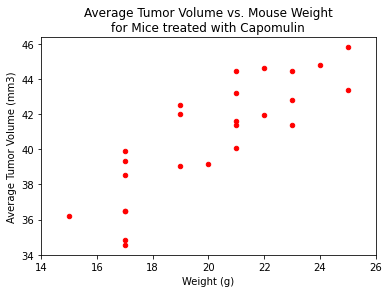

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regime
cap_df = clean_df[  clean_df['Drug Regimen'] == 'Capomulin'   ]
cap_mean_df = cap_df.groupby('Mouse ID').mean()
ax = cap_mean_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', marker='o', color='red')
ax.set_title('Average Tumor Volume vs. Mouse Weight\nfor Mice treated with Capomulin')
ax.set_ylabel('Average Tumor Volume (mm3)');
ax.set_xlim([14,26]);

## Correlation and Regression

R^2 score for the model:      0.71  (correlation coefficient)
Intercept of model:          21.55
Coefficient (slope) of model: 0.95


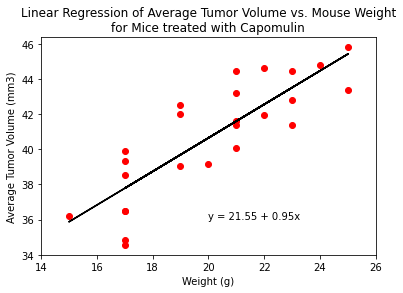

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from sklearn import linear_model
X = cap_mean_df[['Weight (g)']]
y = cap_mean_df['Tumor Volume (mm3)']
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(f'R^2 score for the model:      {lm.score(X,y):.2f}  (correlation coefficient)')
print(f'Intercept of model:          {lm.intercept_:.2f}')
print(f'Coefficient (slope) of model: {lm.coef_[0]:.2f}')
f, ax = plt.subplots()
ax.scatter(X, y, color='red')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Linear Regression of Average Tumor Volume vs. Mouse Weight\nfor Mice treated with Capomulin')
# Below adds the linear regression line
ax.plot(X, lm.predict(X), color='black');
ax.text(20, 36, 'y = 21.55 + 0.95x')
ax.set_xlim([14,26]);
#ax.set_ylim([20, 48])